In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<BarContainer object of 6 artists>

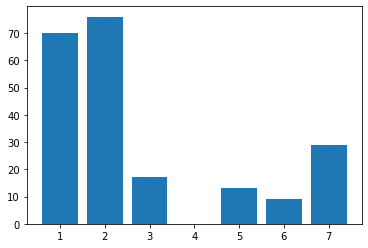

In [3]:
plt.bar(data.groupby('Type').count().index,data.groupby('Type').count().RI)

In [4]:
X = data.drop(['Type'],axis=1)
y = data.Type

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [6]:
model = DecisionTreeClassifier()

In [7]:
kfold = KFold(n_splits=3)

In [8]:
for i in kfold.split(X,y):
    X_train = X.iloc[i[0]]
    X_test = X.iloc[i[1]]
    y_train = y.iloc[i[0]]
    y_test = y.iloc[i[1]]
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

0.013888888888888888
0.18309859154929578
0.028169014084507043


In [9]:
grid_params = {
    'n_estimators':range(50,150,10)
}
grid_model = GridSearchCV(RandomForestClassifier(),grid_params,cv=10)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(50, 150, 10)})

In [10]:
grid_model.best_params_

{'n_estimators': 90}